In [6]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
zinc = pd.read_csv('./data/ZINC_logP_MR_sample.csv')
zinc = zinc[zinc['Length'] <= 16].reset_index(drop=True)

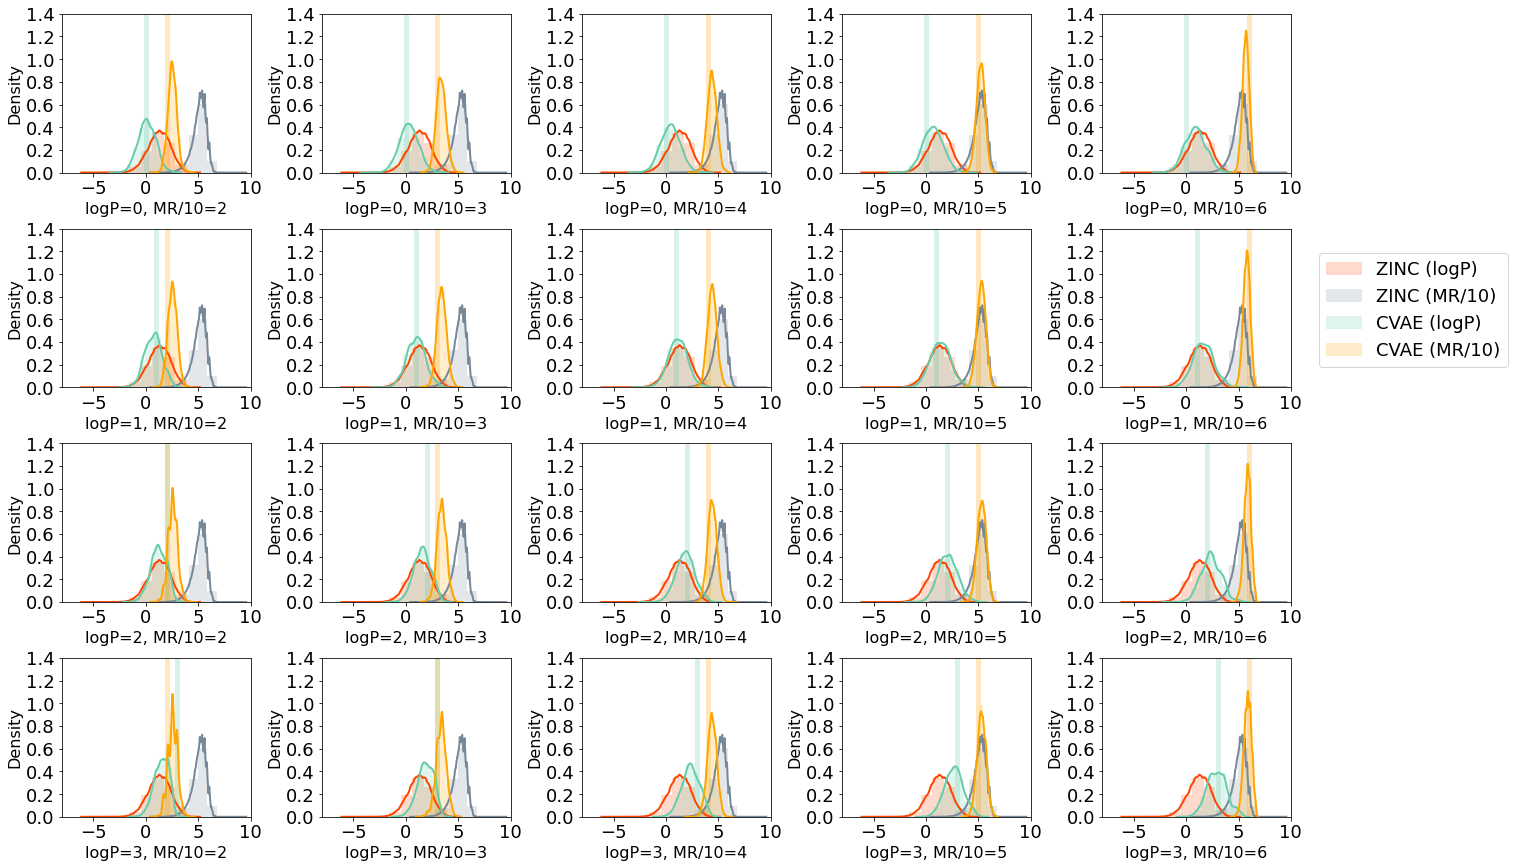

In [3]:
labels = 16
ticks = 18
legends = 18
figs = 3
xl = [-8, 10]
yl = [0, 1.4]
alp = 0.2
lw = 2
lalp = 0.25
clw = 5
b = 10
plt.figure(figsize=(figs*7, figs*4))
kwargs = dict(hist_kws={'alpha':alp}, kde_kws={'linewidth':lw})

n = 1
for i in [0, 1, 2, 3]:
    for j in [2, 3, 4, 5, 6]:
        plt.subplot(4, 5, n)
        cvae = pd.read_csv(f'./results/generated_{i}_{j}.csv')
        plt.plot([i, i], [0, yl[1]], color="mediumaquamarine", alpha=lalp, linewidth=clw)
        plt.plot([j, j], [0, yl[1]], color="orange", alpha=lalp, linewidth=clw)
        sns.distplot(zinc['logP'], color="orangered", label="ZINC (logP)", bins=b, **kwargs)
        sns.distplot(zinc['MR']/10, color="lightslategrey", label="ZINC (MR/10)", bins=b, **kwargs)
        sns.distplot(cvae['C1'], color="mediumaquamarine", label="CVAE (logP)", bins=b, **kwargs)
        sns.distplot(cvae['C2']/10, color="orange", label="CVAE (MR/10)", bins=b, **kwargs)
        plt.xlim(xl)
        plt.xlabel(f'logP={i}, MR/10={j}', fontsize=labels)
        plt.xticks(fontsize=ticks)
        plt.ylim(yl)
        plt.ylabel('Density', fontsize=labels)
        plt.yticks(np.arange(yl[0], yl[1]+0.2, 0.2), fontsize=ticks)
        n += 1
        if n == 11:
            plt.legend(loc='upper left', fontsize=legends, bbox_to_anchor=(1.1, 0.9))
plt.tight_layout(pad=0.5)
plt.show()

Reading File： ./results\generated_0_2.csv
Loaded 30 valid molecules out of 30 SMILES


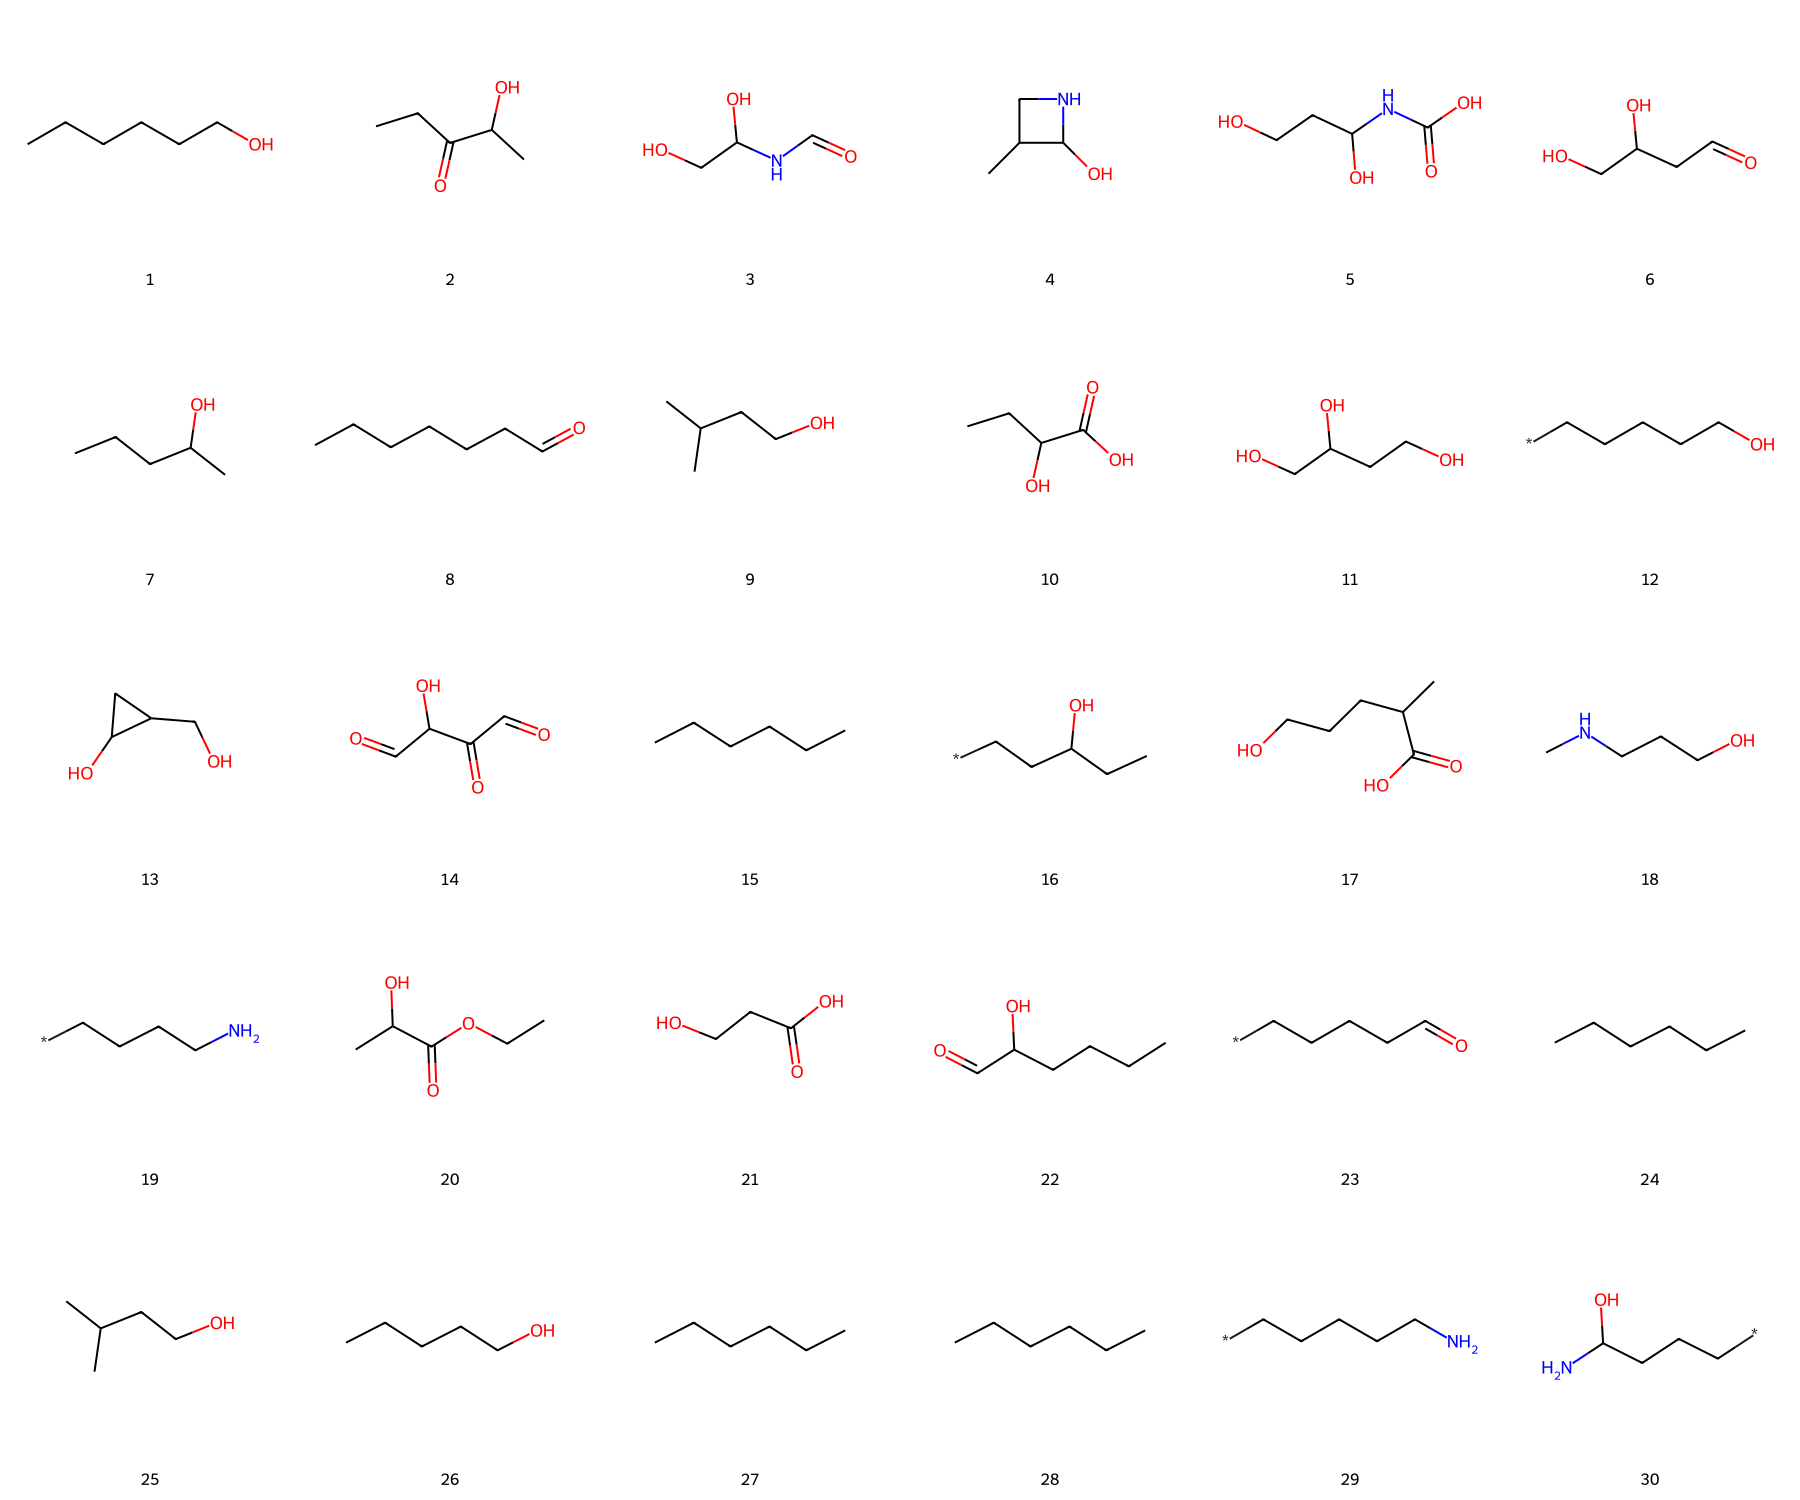

In [7]:
# Draw molecular
folder = "./results"
files = os.listdir(folder)
first_file = os.path.join(folder, files[0])
df = pd.read_csv(first_file)
print("Reading File：", first_file)

df = df.head(30)
smiles_list = df["SMILES"].dropna().astype(str).tolist()

# 转为 RDKit Mol 并计算 2D 坐标
mols = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        AllChem.Compute2DCoords(mol)
        mols.append(mol)

print(f"Loaded {len(mols)} valid molecules out of {len(smiles_list)} SMILES")

# 生成网格图
grid = Draw.MolsToGridImage(
    mols,
    molsPerRow=6,
    subImgSize=(300, 300),
    legends=[str(i+1) for i in range(len(mols))],
    maxMols=100  
)
# 每次默认最多画50个分子若要画更多就要写 maxMols=100+
display(grid)